# Vaccines and patient characteristics

### Import libraries and data

The datasets used for this report are created using the study definition [`/analysis/study_definition.py`](../analysis/study_definition.py), using codelists referenced in [`/codelists/codelists.txt`](../codelists/codelists.txt). 

In [1]:
%load_ext autoreload
%autoreload 2
 
import pandas as pd
import numpy as np
import subprocess
from IPython.display import display, Markdown, HTML

suffix = "_tpp"

# get current branch
current_branch = subprocess.run(["git", "rev-parse", "--abbrev-ref", "HEAD"], capture_output=True).stdout.decode("utf8").strip()

### Import our custom functions

In [2]:
# import custom functions from 'lib' folder
import sys
sys.path.append('../lib/')

In [3]:
from data_processing import load_data

In [4]:
from report_results import find_and_save_latest_date, create_output_dirs

In [5]:
# create output directories to save files into 
savepath, savepath_figure_csvs, savepath_table_csvs = create_output_dirs()

### Load and Process the raw data 

In [6]:
df = load_data()

In [7]:
latest_date, formatted_latest_date = find_and_save_latest_date(df, savepath=savepath)

In [8]:
print(f"Latest Date: {formatted_latest_date}")

Latest Date: 05 Mar 2021


### Summarise by group and demographics at latest date

#### Calculate cumulative sums at each date and select latest date + previous figures for comparison

In [9]:
from report_results import cumulative_sums

In [10]:
# population subgroups - in a dict to indicate which field to filter on


population_subgroups = {"80+":1,
        "70-79":2, 
        "care home":3, 
        "shielding (aged 16-69)":4, 
        "65-69": 5,  
        "LD (aged 16-64)": 6,  
        "60-64": 7,                
        "under 60s, not in other eligible groups shown":0 
        # NB the key for the final group (0) must contain phrase "not in other eligible groups"
        }

groups = population_subgroups.keys()


#  list demographic/clinical factors to include for given group
DEFAULT = ["sex","ageband_5yr","ethnicity_6_groups","ethnicity_16_groups", "imd_categories", 
                              "bmi", "chronic_cardiac_disease", "current_copd", "dialysis", "dmards", "dementia",
                              "psychosis_schiz_bipolar","LD","ssri",
                              "chemo_or_radio", "lung_cancer", "cancer_excl_lung_and_haem", "haematological_cancer"]
o65 = [d for d in DEFAULT if d not in ("ageband_5yr", "dialysis")]
o60 = [d for d in DEFAULT if d not in ("ageband_5yr", "dialysis", "LD")]
other = ["sex","ageband", "ethnicity_6_groups", "ethnicity_16_groups","imd_categories",
                              "bmi","chronic_cardiac_disease", "current_copd", "dmards","ssri"]

# dictionary mapping population subgroups to a list of demographic/clinical factors to include for that group
features_dict = {0:    other, ## patients not assigned to a priority group
                 "care home": ["sex", "ageband_5yr", "ethnicity_6_groups", "dementia"],
                 "shielding (aged 16-69)": ["newly_shielded_since_feb_15", "sex", "ageband", "ethnicity_6_groups", "imd_categories",
                                           "LD"],
                 "65-69":    o65,
                 "60-64":    o60,
                 "LD (aged 16-64)":  ["sex", "ageband_5yr", "ethnicity_6_groups"],
                 "DEFAULT":   DEFAULT # other age groups
                }


In [11]:
df_dict_cum = cumulative_sums(df, groups_of_interest=population_subgroups, features_dict=features_dict, latest_date=latest_date)

### Cumulative vaccination figures - overall

In [12]:
from report_results import make_vaccine_graphs

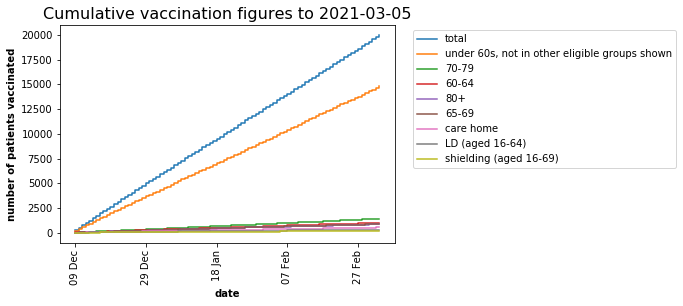

In [13]:
make_vaccine_graphs(df, latest_date=latest_date, savepath=savepath, savepath_figure_csvs=savepath_figure_csvs, suffix=suffix)

### Reports 

In [14]:
from report_results import summarise_data_by_group

In [15]:
summarised_data_dict = summarise_data_by_group(df_dict_cum, latest_date=latest_date, groups=groups)

### Proportion of each eligible population vaccinated to date

In [16]:
from report_results import create_summary_stats, create_detailed_summary_uptake

In [17]:
summ_stat_results = create_summary_stats(df, summarised_data_dict, formatted_latest_date, groups=groups, savepath=savepath, suffix=suffix)

In [18]:
# display the results of the summary stats in notebook
for x in summ_stat_results.keys():
    display(Markdown(f"{x}: {summ_stat_results[x]}"))
    
display(Markdown(f"*\n figures rounded to nearest 7"))

### As at 05 Mar 2021: 

**Total** population vaccinated in TPP: 19,999

**80+** population vaccinated: 882 (41.7% of 2,114)

**70-79** population vaccinated: 1,421 (40.5% of 3,514)

**care home** population vaccinated: 532 (37.5% of 1,414)

**shielding (aged 16-69)** population vaccinated: 161 (38.6% of 420)

**65-69** population vaccinated: 868 (40.4% of 2,149)

**LD (aged 16-64)** population vaccinated: 315 (40.1% of 791)

**60-64** population vaccinated: 1,008 (39.2% of 2,576)

**under 60s, not in other eligible groups shown** population vaccinated: 14,812

#### Vaccine types and second doses: 

Second doses (% of all vaccinated): 4,998 (25.0%)

Oxford-AZ vaccines (% of all first doses): 7 (0.0%)

*
 figures rounded to nearest 7

# Detailed summary of coverage among population groups as at latest date

In [19]:
create_detailed_summary_uptake(summarised_data_dict, formatted_latest_date, 
                               groups=population_subgroups.keys(),
                               savepath=savepath)

## 

## COVID vaccination rollout among **80+** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  \
category                  group                                             
overall                   overall                                     881   
sex                       F                                           462   
                          M                                           420   
ageband_5yr               0                                            56   
                          0-15                                         56   
                          16-29                                        56   
                          30-34                                        63   
                          35-39                                        56   
                          40-44                                        56   
                          45-49                                        49   
                          50-54                                        56   
                          55-59                                        42   
                          60-64                                        49   
                          65-69                                        56   
                          70-74                                        56   
                          75-79                                        56   
                          80-84                                        63   
                          85-89                                        49   
                          90+                                          63   
ethnicity_6_groups        Black                                       154   
                          Mixed                                       147   
                          Other                                       161   
                          South Asian                                 147   
                          Unknown                                     133   
                          White                                       140   
ethnicity_16_groups        African                                     42   
                           Bangladeshi or British Bangladeshi          49   
                           Caribbean                                   56   
                           Chinese                                     49   
                           Other                                       63   
                           Other Asian                                 56   
                          British or Mixed British                     35   
                          Indian or British Indian                     56   
                          Irish                                        49   
                          Other Black                                  35   
                          Other White                                  35   
                          Other mixed                                  49   
                          Pakistani or British Pakistani               56   
                          Unknown                                     133   
                          White + Asian                                49   
                          White + Black African                        42   
                          White + Black Caribbean                      49   
imd_categories            1 Most deprived                             168   
                          2                                           161   
                          3                                           175   
                          4                                           168   
                          5 Least deprived                            161   
                          Unknown                                      49   
bmi                       30+                                         273   
                          under 30                                    609   
chronic_cardiac_disease   no                               

## 

## COVID vaccination rollout among **70-79** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  \
category                  group                                             
overall                   overall                                    1422   
sex                       F                                           714   
                          M                                           707   
ageband_5yr               0                                            77   
                          0-15                                         77   
                          16-29                                        98   
                          30-34                                        91   
                          35-39                                        91   
                          40-44                                        98   
                          45-49                                        77   
                          50-54                                        98   
                          55-59                                        91   
                          60-64                                        70   
                          65-69                                        91   
                          70-74                                       105   
                          75-79                                        77   
                          80-84                                        77   
                          85-89                                        98   
                          90+                                          91   
ethnicity_6_groups        Black                                       238   
                          Mixed                                       252   
                          Other                                       224   
                          South Asian                                 238   
                          Unknown                                     224   
                          White                                       245   
ethnicity_16_groups        African                                     77   
                           Bangladeshi or British Bangladeshi          91   
                           Caribbean                                   63   
                           Chinese                                     63   
                           Other                                       70   
                           Other Asian                                 98   
                          British or Mixed British                     70   
                          Indian or British Indian                     70   
                          Irish                                        63   
                          Other Black                                  70   
                          Other White                                  84   
                          Other mixed                                  84   
                          Pakistani or British Pakistani               63   
                          Unknown                                     238   
                          White + Asian                                77   
                          White + Black African                        70   
                          White + Black Caribbean                      70   
imd_categories            1 Most deprived                             266   
                          2                                           273   
                          3                                           301   
                          4                                           259   
                          5 Least deprived                            252   
                          Unknown                                      63   
bmi                       30+                                         441   
                          under 30                                    980   
chronic_cardiac_disease   no                               

## 

## COVID vaccination rollout among **care home** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  percent  total  \
category           group                                     
overall            overall             530     37.5   1414   
sex                F                   273     37.9    721   
                   M                   259     37.4    693   
ageband_5yr        0                    35     45.5     77   
                   0-15                 35     38.5     91   
                   16-29                42     37.5    112   
                   30-34                28     36.4     77   
                   35-39                42     40.0    105   
                   40-44                21     27.3     77   
                   45-49                35     38.5     91   
                   50-54                28     33.3     84   
                   55-59                35     38.5     91   
                   60-64                35     35.7     98   
                   65-69                28     26.7    105   
                   70-74                35     41.7     84   
                   75-79                35     38.5     91   
                   80-84                21     33.3     63   
                   85-89                28     36.4     77   
                   90+                  28     36.4     77   
ethnicity_6_groups Black                98     41.2    238   
                   Mixed                98     38.9    252   
                   Other                98     35.9    273   
                   South Asian          84     36.4    231   
                   Unknown              70     37.0    189   
                   White                77     34.4    224   
dementia           no                  525     37.7   1393   
                   yes                   0      0.0     14   

                               vaccinated 7d previous (percent)  \
category           group                                          
overall            overall                                 34.4   
sex                F                                         34   
                   M                                       34.3   
ageband_5yr        0                                       45.5   
                   0-15                                    38.5   
                   16-29                                   37.5   
                   30-34                                   36.4   
                   35-39                                   33.3   
                   40-44                                   27.3   
                   45-49                                   30.8   
                   50-54                                   33.3   
                   55-59                                   38.5   
                   60-64                                   35.7   
                   65-69                                   26.7   
                   70-74                                   41.7   
                   75-79                                   38.5   
                   80-84                                   33.3   
                   85-89                                   36.4   
                   90+                                     36.4   
ethnicity_6_groups Black                                   35.3   
                   Mixed                                   36.1   
                   Other                                   33.3   
                   South Asian                             33.3   
                   Unknown                                   37   
                   White                                   31.2   
dementia           no                                      34.7   
                   yes                                        0   

                               Uptake over last 7d (percent)  \
category           group                                       
overall            overall                               3.1   
sex                F                                     3.9   
                   M             

## 

## COVID vaccination rollout among **shielding (aged 16-69)** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  percent  total  \
category                    group                                          
overall                     overall                  162     38.6    420   
newly_shielded_since_feb_15 no                       161     38.3    420   
                            yes                        0      NaN      0   
sex                         F                         84     38.7    217   
                            M                         77     37.9    203   
ageband                     16-29                     28     50.0     56   
                            30-39                     21     37.5     56   
                            40-49                     28     44.4     63   
                            50-59                     21     42.9     49   
                            60-69                     14     28.6     49   
                            70-79                     35     35.7     98   
                            80+                       14     25.0     56   
ethnicity_6_groups          Black                     28     40.0     70   
                            Mixed                     28     44.4     63   
                            Other                     21     33.3     63   
                            South Asian               21     30.0     70   
                            Unknown                   28     44.4     63   
                            White                     35     41.7     84   
imd_categories              1 Most deprived           21     30.0     70   
                            2                         42     42.9     98   
                            3                         28     33.3     84   
                            4                         35     41.7     84   
                            5 Least deprived          28     36.4     77   
                            Unknown                    7     33.3     21   
LD                          no                       161     39.0    413   
                            yes                        0      0.0      7   

                                             vaccinated 7d previous (percent)  \
category                    group                                               
overall                     overall                                      36.2   
newly_shielded_since_feb_15 no                                             35   
                            yes                                           NaN   
sex                         F                                            35.5   
                            M                                            37.9   
ageband                     16-29                                          50   
                            30-39                                          25   
                            40-49                                        44.4   
                            50-59                                        42.9   
                            60-69                                        28.6   
                            70-79                                        35.7   
                            80+                                            25   
ethnicity_6_groups          Black                                          30   
                            Mixed                                        44.4   
                            Other                                        33.3   
                            South Asian                                    30   
                            Unknown                                      44.4   
                            White                                        41.7   
imd_categories              1 Most deprived                                30   
                            2                                            35.7   
                            3                                            33.3   
                            4                         

## 

## COVID vaccination rollout among **65-69** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  \
category                  group                                             
overall                   overall                                     868   
sex                       F                                           441   
                          M                                           427   
ethnicity_6_groups        Black                                       161   
                          Mixed                                       140   
                          Other                                       154   
                          South Asian                                 147   
                          Unknown                                     126   
                          White                                       140   
ethnicity_16_groups        African                                     49   
                           Bangladeshi or British Bangladeshi          49   
                           Caribbean                                   35   
                           Chinese                                     49   
                           Other                                       49   
                           Other Asian                                 42   
                          British or Mixed British                     49   
                          Indian or British Indian                     56   
                          Irish                                        49   
                          Other Black                                  35   
                          Other White                                  56   
                          Other mixed                                  42   
                          Pakistani or British Pakistani               49   
                          Unknown                                     133   
                          White + Asian                                49   
                          White + Black African                        42   
                          White + Black Caribbean                      42   
imd_categories            1 Most deprived                             154   
                          2                                           168   
                          3                                           175   
                          4                                           161   
                          5 Least deprived                            182   
                          Unknown                                      28   
bmi                       30+                                         259   
                          under 30                                    609   
chronic_cardiac_disease   no                                          854   
                          yes                                          14   
current_copd              no                                          868   
                          yes                                           0   
dmards                    no                                          861   
                          yes                                           7   
dementia                  no                                          861   
                          yes                                           7   
psychosis_schiz_bipolar   no                                          861   
                          yes                                           7   
LD                        no                                          847   
                          yes                                          21   
ssri                      no                                          861   
                          yes                                           0   
chemo_or_radio            no                                          861   
                          yes                                           0   
lung_cancer               no                               

## 

## COVID vaccination rollout among **LD (aged 16-64)** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  percent  total  \
category           group                                     
overall            overall             317     40.1    791   
sex                F                   154     39.3    392   
                   M                   168     42.1    399   
ageband_5yr        0                    28     50.0     56   
                   0-15                 21     42.9     49   
                   16-29                28     50.0     56   
                   30-34                14     28.6     49   
                   35-39                28     50.0     56   
                   40-44                21     42.9     49   
                   45-49                28     44.4     63   
                   50-54                21     37.5     56   
                   55-59                28     50.0     56   
                   60-64                14     40.0     35   
                   65-69                21     42.9     49   
                   70-74                21     42.9     49   
                   75-79                14     28.6     49   
                   80-84                 7     20.0     35   
                   85-89                14     33.3     42   
                   90+                  14     33.3     42   
ethnicity_6_groups Black                56     40.0    140   
                   Mixed                56     44.4    126   
                   Other                56     42.1    133   
                   South Asian          42     33.3    126   
                   Unknown              49     38.9    126   
                   White                63     45.0    140   

                               vaccinated 7d previous (percent)  \
category           group                                          
overall            overall                                 36.3   
sex                F                                       35.7   
                   M                                       36.8   
ageband_5yr        0                                         50   
                   0-15                                    42.9   
                   16-29                                   37.5   
                   30-34                                   14.3   
                   35-39                                     50   
                   40-44                                   42.9   
                   45-49                                   44.4   
                   50-54                                   37.5   
                   55-59                                   37.5   
                   60-64                                     40   
                   65-69                                   42.9   
                   70-74                                   28.6   
                   75-79                                   28.6   
                   80-84                                     20   
                   85-89                                   33.3   
                   90+                                     33.3   
ethnicity_6_groups Black                                     35   
                   Mixed                                   38.9   
                   Other                                   36.8   
                   South Asian                             33.3   
                   Unknown                                 33.3   
                   White                                     40   

                               Uptake over last 7d (percent)  \
category           group                                       
overall            overall                               3.8   
sex                F                                     3.6   
                   M                                     5.3   
ageband_5yr        0                                       0   
                   0-15                                    0   
                   16-29                                12.5   
                   30-34           

## 

## COVID vaccination rollout among **60-64** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  \
category                  group                                             
overall                   overall                                    1009   
sex                       F                                           497   
                          M                                           511   
ethnicity_6_groups        Black                                       161   
                          Mixed                                       168   
                          Other                                       203   
                          South Asian                                 168   
                          Unknown                                     140   
                          White                                       168   
ethnicity_16_groups        African                                     42   
                           Bangladeshi or British Bangladeshi          49   
                           Caribbean                                   63   
                           Chinese                                     56   
                           Other                                       49   
                           Other Asian                                 49   
                          British or Mixed British                     49   
                          Indian or British Indian                     56   
                          Irish                                        63   
                          Other Black                                  63   
                          Other White                                  49   
                          Other mixed                                  42   
                          Pakistani or British Pakistani               56   
                          Unknown                                     161   
                          White + Asian                                49   
                          White + Black African                        49   
                          White + Black Caribbean                      56   
imd_categories            1 Most deprived                             182   
                          2                                           203   
                          3                                           210   
                          4                                           196   
                          5 Least deprived                            175   
                          Unknown                                      49   
bmi                       30+                                         294   
                          under 30                                    714   
chronic_cardiac_disease   no                                          994   
                          yes                                          14   
current_copd              no                                         1001   
                          yes                                           7   
dmards                    no                                         1001   
                          yes                                           7   
dementia                  no                                          994   
                          yes                                          14   
psychosis_schiz_bipolar   no                                          994   
                          yes                                          14   
ssri                      no                                         1008   
                          yes                                           0   
chemo_or_radio            no                                         1001   
                          yes                                           7   
lung_cancer               no                                         1001   
                          yes                                          14   
cancer_excl_lung_and_haem no                               

## 

## COVID vaccination rollout among **under 60s, not in other eligible groups shown** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  \
category                group                                             
overall                 overall                                   14811   
sex                     F                                          7630   
                        M                                          7182   
ageband                 16-29                                      1771   
                        30-39                                      1834   
                        40-49                                      1862   
                        50-59                                      1918   
                        60-69                                      1876   
                        70-79                                      3689   
                        80+                                        1862   
ethnicity_6_groups      Black                                      2436   
                        Mixed                                      2548   
                        Other                                      2527   
                        South Asian                                2562   
                        Unknown                                    2212   
                        White                                      2513   
ethnicity_16_groups      African                                    819   
                         Bangladeshi or British Bangladeshi         735   
                         Caribbean                                  812   
                         Chinese                                    798   
                         Other                                      735   
                         Other Asian                                819   
                        British or Mixed British                    770   
                        Indian or British Indian                    770   
                        Irish                                       763   
                        Other Black                                 854   
                        Other White                                 770   
                        Other mixed                                 777   
                        Pakistani or British Pakistani              791   
                        Unknown                                    2254   
                        White + Asian                               798   
                        White + Black African                       749   
                        White + Black Caribbean                     791   
imd_categories          1 Most deprived                            2793   
                        2                                          2863   
                        3                                          2856   
                        4                                          2772   
                        5 Least deprived                           2828   
                        Unknown                                     707   
bmi                     30+                                        4375   
                        under 30                                  10437   
chronic_cardiac_disease no                                        14686   
                        yes                                         126   
current_copd            no                                        14644   
                        yes                                         161   
dmards                  no                                        14651   
                        yes                                         154   
ssri                    no                                        14665   
                        yes                                         147   

                                                            vaccinated 7d previous  \
category                group                                                        
overall                 overall                                

# Demographics time trend charts

In [20]:
from report_results import plot_dem_charts

## 
 ## COVID vaccination rollout among **80+** population up to 05 Mar 2021

### COVID vaccinations among **80+** population by **sex**

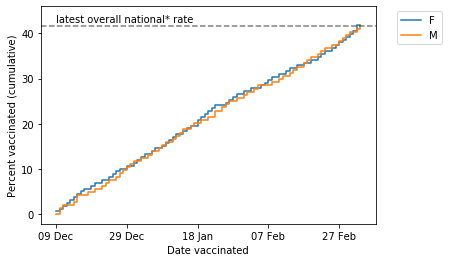

### COVID vaccinations among **80+** population by **ageband 5yr**

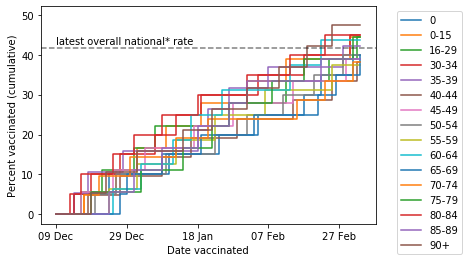

### COVID vaccinations among **80+** population by **ethnicity 6 groups**

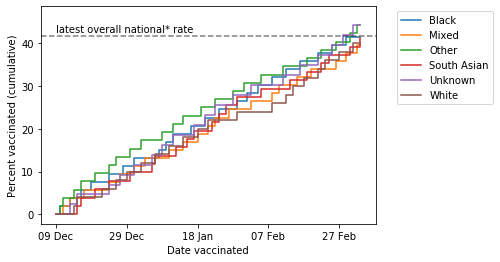

### COVID vaccinations among **80+** population by **imd categories**

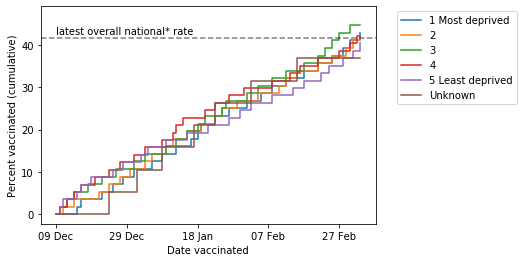

### COVID vaccinations among **80+** population by **bmi**

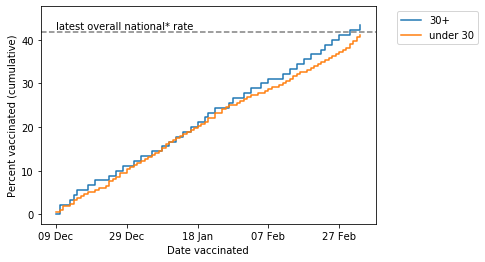

### COVID vaccinations among **80+** population by **chronic cardiac disease**

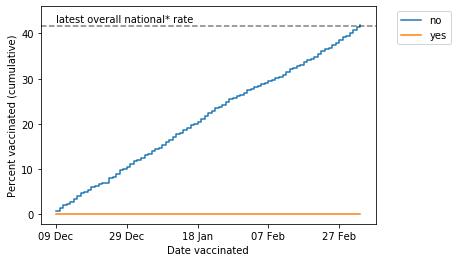

### COVID vaccinations among **80+** population by **current copd**

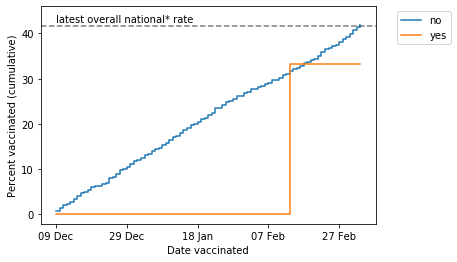

### COVID vaccinations among **80+** population by **dialysis**

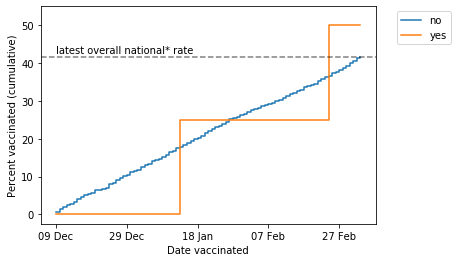

### COVID vaccinations among **80+** population by **dementia**

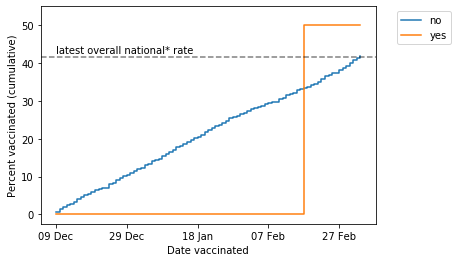

### COVID vaccinations among **80+** population by **psychosis schiz bipolar**

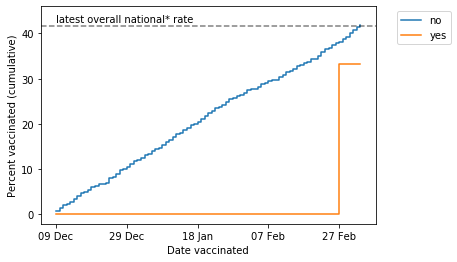

### COVID vaccinations among **80+** population by **LD**

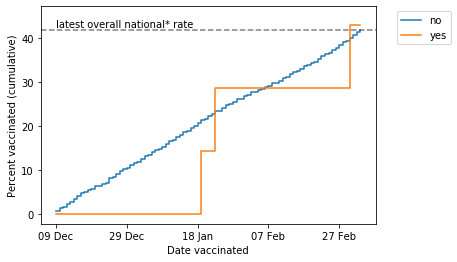

### COVID vaccinations among **80+** population by **ssri**

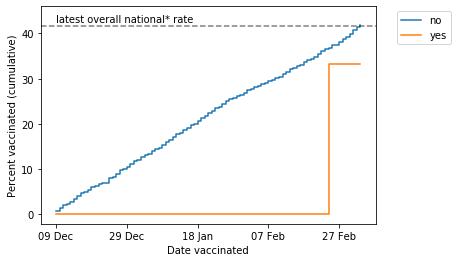

## 
 ## COVID vaccination rollout among **70-79** population up to 05 Mar 2021

### COVID vaccinations among **70-79** population by **sex**

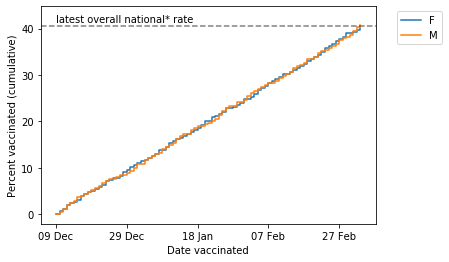

### COVID vaccinations among **70-79** population by **ageband 5yr**

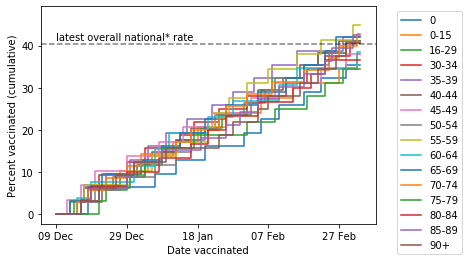

### COVID vaccinations among **70-79** population by **ethnicity 6 groups**

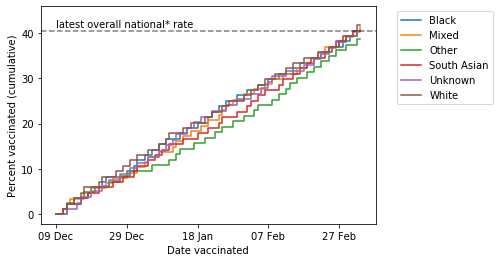

### COVID vaccinations among **70-79** population by **imd categories**

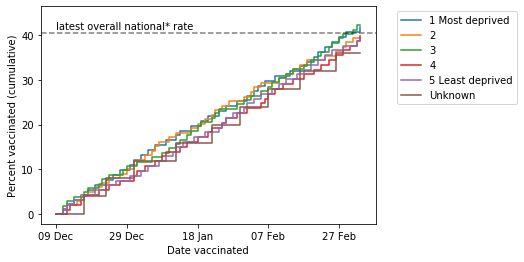

### COVID vaccinations among **70-79** population by **bmi**

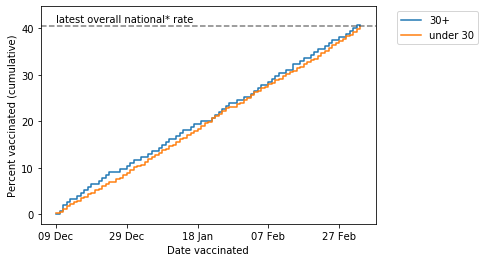

### COVID vaccinations among **70-79** population by **chronic cardiac disease**

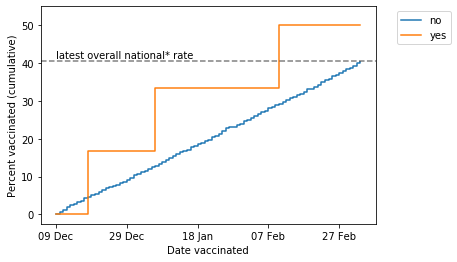

### COVID vaccinations among **70-79** population by **current copd**

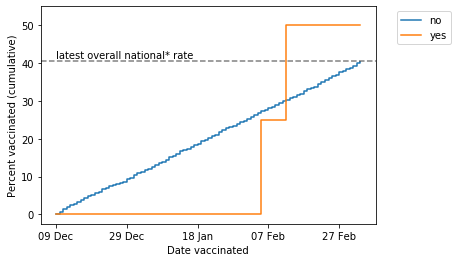

### COVID vaccinations among **70-79** population by **dialysis**

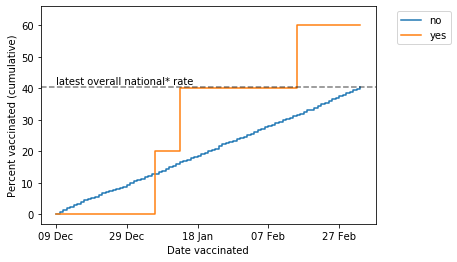

### COVID vaccinations among **70-79** population by **dementia**

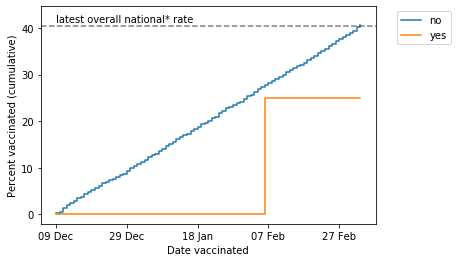

### COVID vaccinations among **70-79** population by **psychosis schiz bipolar**

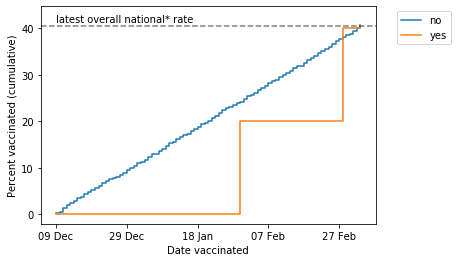

### COVID vaccinations among **70-79** population by **LD**

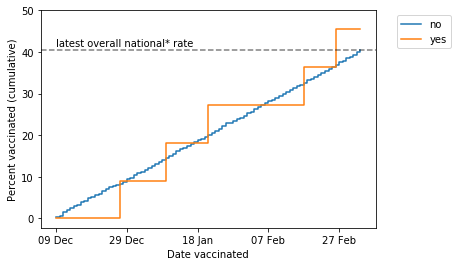

### COVID vaccinations among **70-79** population by **ssri**

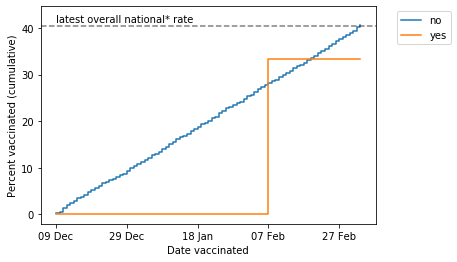

## 
 ## COVID vaccination rollout among **65-69** population up to 05 Mar 2021

### COVID vaccinations among **65-69** population by **sex**

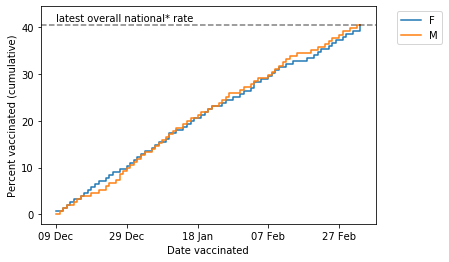

### COVID vaccinations among **65-69** population by **ethnicity 6 groups**

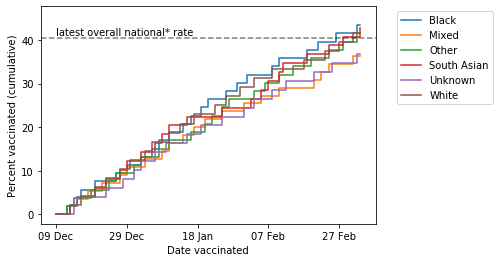

### COVID vaccinations among **65-69** population by **imd categories**

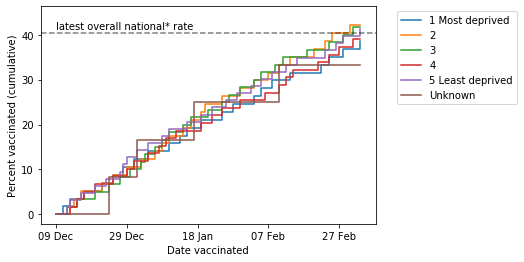

### COVID vaccinations among **65-69** population by **bmi**

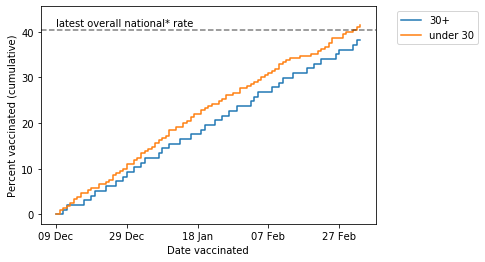

### COVID vaccinations among **65-69** population by **chronic cardiac disease**

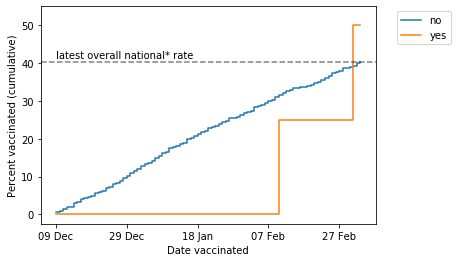

### COVID vaccinations among **65-69** population by **current copd**

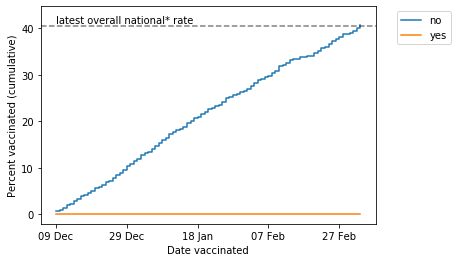

### COVID vaccinations among **65-69** population by **dementia**

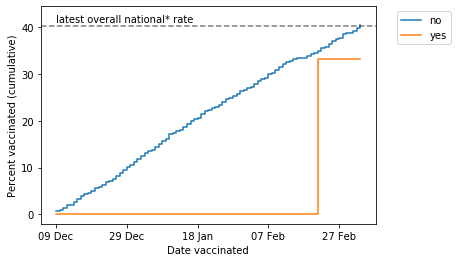

### COVID vaccinations among **65-69** population by **psychosis schiz bipolar**

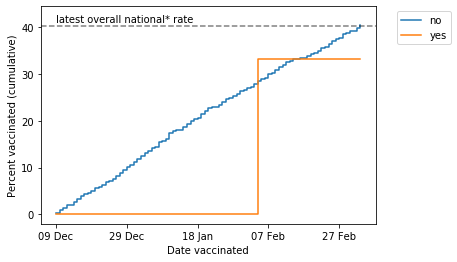

### COVID vaccinations among **65-69** population by **LD**

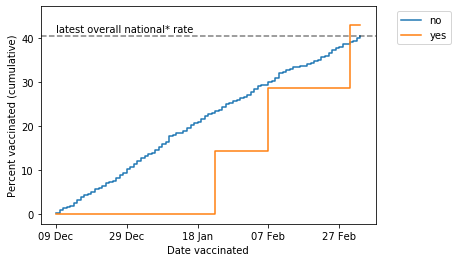

### COVID vaccinations among **65-69** population by **ssri**

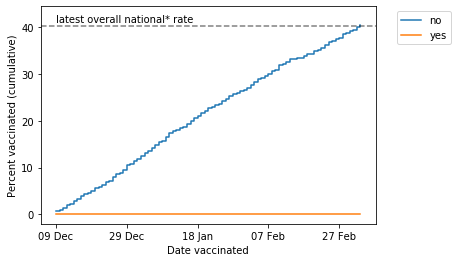

## 
 ## COVID vaccination rollout among **shielding (aged 16-69)** population up to 05 Mar 2021

### COVID vaccinations among **shielding (aged 16-69)** population by **newly shielded since feb 15**

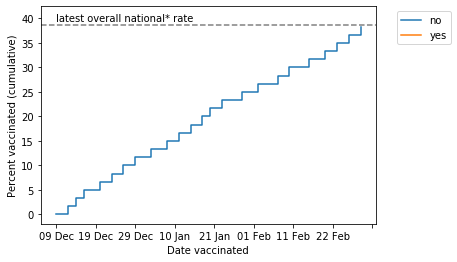

### COVID vaccinations among **shielding (aged 16-69)** population by **sex**

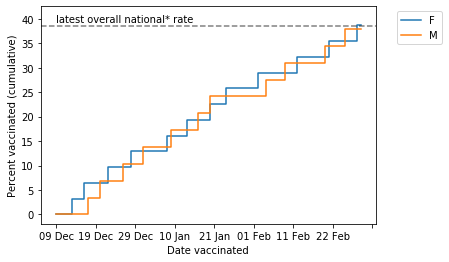

### COVID vaccinations among **shielding (aged 16-69)** population by **ageband**

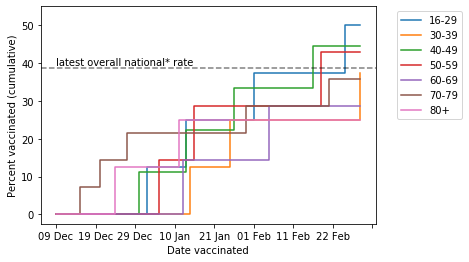

### COVID vaccinations among **shielding (aged 16-69)** population by **ethnicity 6 groups**

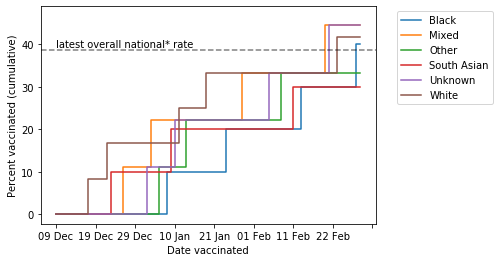

### COVID vaccinations among **shielding (aged 16-69)** population by **imd categories**

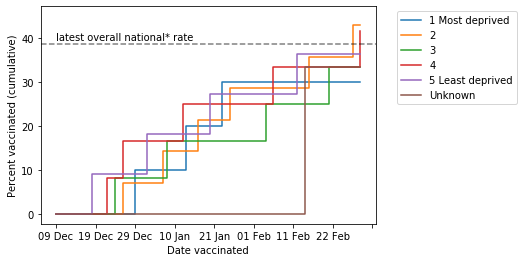

### COVID vaccinations among **shielding (aged 16-69)** population by **LD**

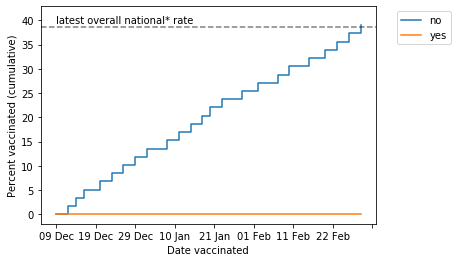

## 
 ## COVID vaccination rollout among **60-64** population up to 05 Mar 2021

### COVID vaccinations among **60-64** population by **sex**

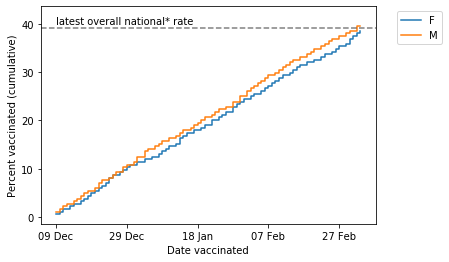

### COVID vaccinations among **60-64** population by **ethnicity 6 groups**

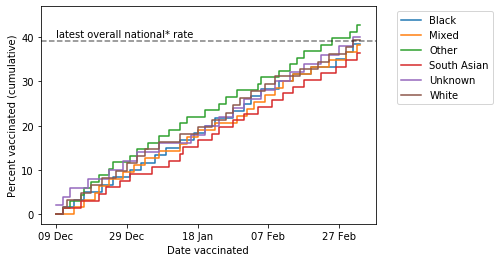

### COVID vaccinations among **60-64** population by **imd categories**

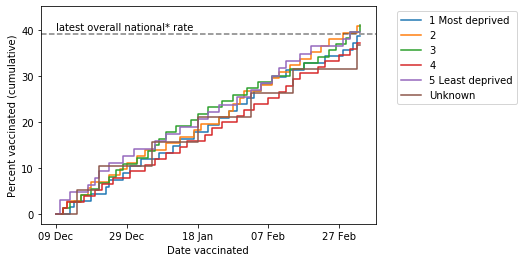

### COVID vaccinations among **60-64** population by **bmi**

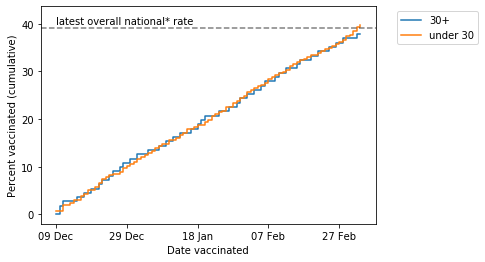

### COVID vaccinations among **60-64** population by **chronic cardiac disease**

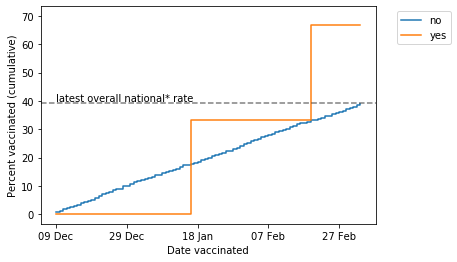

### COVID vaccinations among **60-64** population by **current copd**

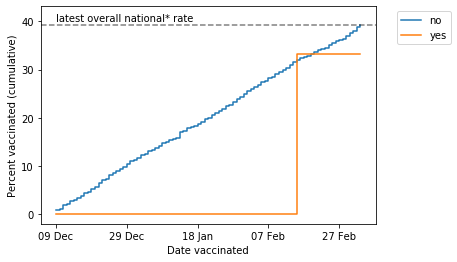

### COVID vaccinations among **60-64** population by **dementia**

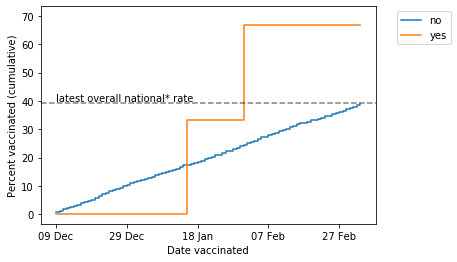

### COVID vaccinations among **60-64** population by **psychosis schiz bipolar**

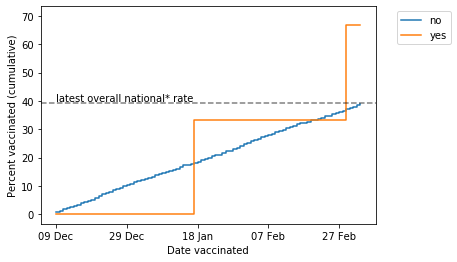

### COVID vaccinations among **60-64** population by **ssri**

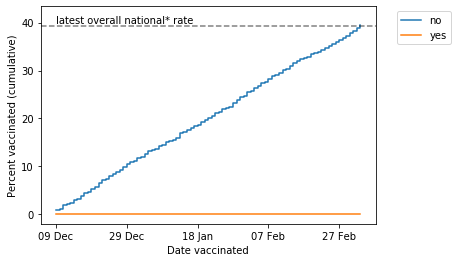

In [21]:
plot_dem_charts(summ_stat_results, df_dict_cum,  formatted_latest_date, pop_subgroups=["80+", "70-79", "65-69","shielding (aged 16-69)", "60-64"], groups_dict=features_dict,
                groups_to_exclude=["ethnicity_16_groups", "dmards", "chemo_or_radio", "lung_cancer", "cancer_excl_lung_and_haem", "haematological_cancer"],
                savepath=savepath, savepath_figure_csvs=savepath_figure_csvs, suffix=suffix)

## Completeness of ethnicity recording

In [22]:
from data_quality import *

ethnicity_completeness(df=df, groups_of_interest=population_subgroups)


Total **80+** population with ethnicity recorded 1,813 (85.8%)

Total **70-79** population with ethnicity recorded 2,961 (84.3%)

Total **care home** population with ethnicity recorded 1,218 (86.1%)

Total **shielding (aged 16-69)** population with ethnicity recorded 357 (85.0%)

Total **65-69** population with ethnicity recorded 1,806 (84.0%)

Total **LD (aged 16-64)** population with ethnicity recorded 665 (84.1%)

Total **60-64** population with ethnicity recorded 2,226 (86.4%)

Total **vaccinated under 60s, not in other eligible groups shown** population with ethnicity recorded 31,458 (85.0%)